## Ähnlichkeiten berechnen
Ähnlichkeit zwischen zwei Personen anhand ihrer Fragebogen-Antworten numerisch ausdrücken 

survey_similarity(person1, person2) 

Idee: Nur nummerische Werte benutzen, alle Fragen die mit 1-5 bewertet werden konnten, sowie das Alter, Geschlecht und Studiengang

In [32]:
import numpy as np 
import pandas as pd  
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
filename = "./data/survery_data_annonymized_230626_clean.csv"

data = pd.read_csv(filename)

In [34]:
#unwichtig, sagt nicht viel aus 
col_remove = ["Position_num",
              "Basketball",
              "Fußball",
              "Handball",
              "Football",
              "Hockey",
              "Volleyball",
              "Tennis",
              "Yoga",
              "Kampfsport",
              "Tanzen",
              "Leichtathletik",
              "Bouldern/Klettern",
              "Schwimmen",
              "Wassersport",
              "Reiten",
              "Wintersport",
              "Rennrad/Mountainbike"]

In [35]:
from sklearn.decomposition import PCA

sportarten = data.copy()[col_remove]

pca = PCA(n_components=1)
pca.fit(sportarten) # fit meint, ich trainere/ lerne etwas
X_pca = pca.transform(sportarten)

In [36]:
data['sports_factor'] = X_pca

In [37]:
data_numerical = data.copy().select_dtypes(include='number')

data_numerical = data_numerical.drop(col_remove, axis=1)

In [38]:
data_numerical

,Alter,Sportlichkeit,Gesunde_Ernaehrung,Essen_gehen,Kochen,Feiern,Musik,Lesen,Darstellende_Kunst,Filme,...,Abgaben_spaet,Neugier_Lebensmittel,Natur,Verreisen,Handwerk,Sprachnachrichten,Wichtigkeit_Geld,Geschlecht_num,Studiengang_num,sports_factor
0,28,4,4,3,4,3,5,4,3,3,...,2,5,5,2,2,3,3,1,3,0.258068
1,26,3,4,4,5,2,4,2,3,4,...,2,4,3,3,4,3,4,1,3,0.011600
2,24,2,5,4,4,3,5,2,3,4,...,1,3,2,3,2,4,3,1,3,0.609029
3,23,5,2,4,4,2,3,3,2,4,...,3,5,4,4,2,3,3,1,3,0.585324
4,24,3,4,3,2,1,3,4,2,5,...,5,2,3,4,3,3,4,0,3,0.623931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,26,1,4,4,5,2,5,3,4,5,...,1,4,3,2,3,1,3,1,3,0.278583
58,22,3,3,4,4,3,4,1,1,2,...,3,4,3,4,4,1,5,1,2,-0.296903
59,25,3,3,4,3,2,4,4,3,3,...,4,4,5,3,4,2,2,0,2,-0.109839
60,31,3,4,5,5,3,5,4,4,5,...,2,5,4,4,3,2,3,0,0,0.669321


In [39]:
#Da war das Alter miteinbeziehen, haben wir uns dafür entschieden, die Daten zu skalieren
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(data_numerical)
print("Standardized Data:")
print(standardized_data)

Standardized Data:
[[ 0.55507333  0.72889252  0.55296675 ...  0.63960215  1.06493344
   0.4150955 ]
 [ 0.10520998 -0.2981833   0.55296675 ...  0.63960215  1.06493344
   0.01865871]
 [-0.34465337 -1.32525912  1.77739314 ...  0.63960215  1.06493344
   0.97960642]
 ...
 [-0.1197217  -0.2981833  -0.67145963 ... -1.56347192  0.13499156
  -0.17667264]
 [ 1.22986836 -0.2981833   0.55296675 ... -1.56347192 -1.7248922
   1.07658451]
 [-0.1197217  -1.32525912 -1.89588601 ...  0.63960215  0.13499156
   0.46839321]]


In [40]:
data_numerical = standardized_data

In [41]:
#Testen von Möglichkeiten, zwei Teilnehmer zu vergleichen
import numpy as np

data_array1 = data_numerical[0] 
data_array2 = data_numerical[1]

data_array1, data_array2

(array([ 0.55507333,  0.72889252,  0.55296675, -0.87119691,  0.18179956,
         0.15329615,  1.07151675,  0.72740887,  0.31412676, -0.8272525 ,
        -0.03793823, -0.82487618, -0.99179754, -0.55101405, -0.15897488,
        -0.80339695, -0.85228648,  0.07900758, -0.49562147,  0.07202824,
         0.09723056, -0.3633131 ,  1.54616461,  0.21657404,  0.49466164,
         1.48362952, -0.5875097 , -0.46883903,  0.26552513, -1.30432632,
         1.65227338, -0.62196632, -1.2282795 ,  1.04178493,  2.05039174,
        -1.        , -0.94527391,  0.28788316, -0.37563852,  0.63960215,
         1.06493344,  0.4150955 ]),
 array([ 0.10520998, -0.2981833 ,  0.55296675,  0.1479391 ,  1.20648797,
        -0.71073668,  0.        , -0.91256749,  0.31412676,  0.28774   ,
         0.74611848,  0.9386522 ,  0.45506005,  1.2470318 ,  0.93618538,
         0.82973783,  0.90910558,  0.07900758,  0.35794884,  0.07202824,
         0.09723056, -0.3633131 , -1.27331203,  0.21657404, -1.6204433 ,
         0.2235

In [42]:
from numpy.linalg import norm

cos_sim = np.dot(data_array1, data_array2)/(norm(data_array1)*norm(data_array2))

In [43]:
cos_sim

-0.16230935883910158

In [44]:
from numpy.linalg import norm

def survey_similarity(person1, person2):
    cos_sim = np.dot(person1, person2)/(norm(person1)*norm(person2))
    print(cos_sim)

#survey_similarity(data_numerical.iloc[0].to_numpy(),data_numerical.iloc[10].to_numpy())
survey_similarity(data_numerical[0],data_numerical[1])

-0.16230935883910158


In [45]:
#Ähnlichkeiten für alle Teilnehmer berechnen
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(data_numerical)

In [46]:
cosine_sim[0]

array([ 1.        , -0.16230936,  0.0474342 ,  0.12631995, -0.04027449,
        0.11463652, -0.09911218,  0.26708905, -0.07133993, -0.192074  ,
       -0.18170179, -0.31298011, -0.03906554,  0.04589853, -0.23429499,
       -0.06283562, -0.25149086, -0.23238452, -0.09531024,  0.09187223,
        0.21009689, -0.06338493, -0.13499215, -0.07984406, -0.08871043,
        0.29579961,  0.22812056,  0.09324833,  0.04928281, -0.00704702,
       -0.07302979,  0.20515222, -0.00981062, -0.06436729, -0.17368077,
        0.03385484, -0.00991977, -0.1818858 , -0.03467151, -0.10298494,
        0.04332247,  0.17540552, -0.03130429, -0.0585206 ,  0.01559389,
       -0.44494107,  0.06484283,  0.01318747, -0.06111773,  0.03951617,
        0.05491272,  0.34674478, -0.13602904, -0.25400997,  0.07665504,
        0.07229131,  0.2548735 ,  0.12736853,  0.11311301,  0.09304511,
       -0.04405597, -0.04606745])

In [47]:
grenzwert = 0.3

In [48]:
import networkx as nx

G = nx.Graph()

In [49]:
length = len(cosine_sim)
length

62

In [50]:
for p in range(cosine_sim.shape[0]):
    for i in cosine_sim[p]:
        if (i > grenzwert) and (i < 1):
            test = np.where(cosine_sim[p] == i)
            test = test[0][0]
            if(data.loc[p].Pseudonym != data.loc[test].Pseudonym):
                G.add_edge(data.loc[p].Pseudonym, data.loc[test].Pseudonym)
                print(data.loc[p].Pseudonym, data.loc[test].Pseudonym)
        else:
            G.add_node(data.loc[p].Pseudonym)
            

lalala-lololo TV
hbstr bangnon123
hbstr 7bpf8
hbstr DRP
hbstr Stempelliebhaber
Panda aw17
Panda Stempelliebhaber
TomTom Navigation 242
TomTom Navigation FB42
242 TomTom Navigation
242 7bpf8
242 Moin123
3186 KaHo
3186 S.R.R.
air-oughtest-wood-abate agalper
air-oughtest-wood-abate ac1306
one_more_datapoint Quantum342 (ChatGPT)
one_more_datapoint kevkev
Quantum342 (ChatGPT) one_more_datapoint
Quantum342 (ChatGPT) 123
Quantum342 (ChatGPT) mava
Quantum342 (ChatGPT) oretani
2111 AOoOA
2111 5714
2111 Tobbi
Ismail eprotizu
Ismail 420
Ismail yeet
Ismail SugarDaddy
bangnon123 hbstr
bangnon123 420


bangnon123 7bpf8
bangnon123 XORA
eprotizu Ismail
eprotizu 420
eprotizu yeet
eprotizu Mk27
eprotizu JustTill
sekkuro 420
sekkuro asdf
sekkuro Ark
420 Ismail
420 bangnon123
420 eprotizu
420 sekkuro
420 6VGOD2
420 mava
123 Quantum342 (ChatGPT)
123 saja
123 kevkev
123 Ysaja
123 asdf
123 oretani
AOoOA 2111
AOoOA Ersan 
Heartist aw17
Heartist XORA
Heartist Btr
Heartist Kled07
dotf_23 899091
dotf_23 Ark
dotf_23 Sam
dotf_23 Mfi62
FB42 TomTom Navigation
7bpf8 hbstr
7bpf8 242
7bpf8 bangnon123
7bpf8 MBH22
5714 2111
5714 nomercy
5714 Lm1711
5714 JustTill
MBH22 7bpf8
yeet Ismail
yeet eprotizu
nomercy 5714
agalper air-oughtest-wood-abate
agalper ac1306
agalper Stempelliebhaber
agalper PaBe28
ac1306 air-oughtest-wood-abate
ac1306 agalper
brnlq 899091
saja 123
saja Tobbi
kevkev one_more_datapoint
kevkev 123
kevkev asdf
kevkev Mfi62
kevkev oretani
Moin123 242
6VGOD2 420
6VGOD2 Sam
mava Quantum342 (ChatGPT)
mava 420
KaHo 3186
KaHo Btr
Tobbi 2111
Tobbi saja
Tobbi Lm1711
Tobbi D1C2D327
Ersan  AOoOA
Ersan 

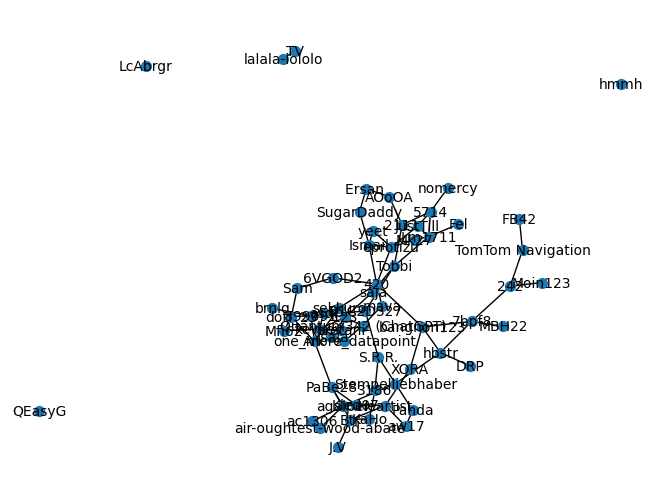

In [51]:
nx.draw(G,
        with_labels=True,
        font_size=10,
        node_size=50)

In [52]:
G.degree()

DegreeView({'lalala-lololo': 1, 'TV': 1, 'hbstr': 4, 'bangnon123': 4, '7bpf8': 4, 'DRP': 1, 'Stempelliebhaber': 4, 'Panda': 2, 'aw17': 2, 'TomTom Navigation': 2, '242': 3, 'FB42': 1, 'LcAbrgr': 0, 'Moin123': 1, '3186': 2, 'KaHo': 2, 'S.R.R.': 3, 'air-oughtest-wood-abate': 2, 'agalper': 4, 'ac1306': 2, 'one_more_datapoint': 2, 'Quantum342 (ChatGPT)': 4, 'kevkev': 5, '123': 6, 'mava': 2, 'oretani': 4, '2111': 3, 'AOoOA': 2, '5714': 4, 'Tobbi': 4, 'Ismail': 4, 'eprotizu': 5, '420': 6, 'yeet': 2, 'SugarDaddy': 2, 'XORA': 2, 'Mk27': 2, 'JustTill': 3, 'sekkuro': 3, 'asdf': 3, 'Ark': 4, '6VGOD2': 2, 'saja': 2, 'Ysaja': 2, 'Ersan ': 2, 'Heartist': 4, 'Btr': 4, 'Kled07': 2, 'dotf_23': 4, '899091': 4, 'Sam': 2, 'Mfi62': 2, 'MBH22': 1, 'nomercy': 1, 'Lm1711': 5, 'PaBe28': 4, 'brnlq': 1, 'QEasyG': 0, 'D1C2D327': 3, 'hmmh': 0, 'J.V': 1, 'Fel': 1})

In [53]:
nx.density(G)

0.04336329984135378

In [54]:
nx.betweenness_centrality(G)

{'lalala-lololo': 0.0,
 'TV': 0.0,
 'hbstr': 0.10581967213114754,
 'bangnon123': 0.22156648451730418,
 '7bpf8': 0.14153005464480875,
 'DRP': 0.0,
 'Stempelliebhaber': 0.12918488160291441,
 'Panda': 0.012126593806921675,
 'aw17': 0.004275956284153005,
 'TomTom Navigation': 0.030054644808743168,
 '242': 0.08797814207650273,
 'FB42': 0.0,
 'LcAbrgr': 0.0,
 'Moin123': 0.0,
 '3186': 0.018210382513661205,
 'KaHo': 0.01046903460837887,
 'S.R.R.': 0.10412568306010928,
 'air-oughtest-wood-abate': 0.0,
 'agalper': 0.07410746812386157,
 'ac1306': 0.0,
 'one_more_datapoint': 0.0010928961748633878,
 'Quantum342 (ChatGPT)': 0.045860655737704925,
 'kevkev': 0.033023679417122045,
 '123': 0.07225865209471767,
 'mava': 0.054166666666666634,
 'oretani': 0.00639344262295082,
 '2111': 0.046010928961748625,
 'AOoOA': 0.01406193078324226,
 '5714': 0.03963570127504554,
 'Tobbi': 0.14564663023679417,
 'Ismail': 0.06380692167577412,
 'eprotizu': 0.10180327868852458,
 '420': 0.30081967213114746,
 'yeet': 0.0,
 '

In [55]:
edge_betweenness = nx.edge_betweenness_centrality(G)
pd.DataFrame(edge_betweenness.items())

,0,1
0,"(lalala-lololo, TV)",0.000529
1,"(hbstr, bangnon123)",0.063203
2,"(hbstr, 7bpf8)",0.047065
3,"(hbstr, DRP)",0.029614
4,"(hbstr, Stempelliebhaber)",0.094544
...,...,...
77,"(dotf_23, Sam)",0.027825
78,"(dotf_23, Mfi62)",0.039776
79,"(899091, brnlq)",0.029614
80,"(899091, D1C2D327)",0.063485


In [56]:
pd.DataFrame(edge_betweenness.items()).sort_values(by=[1], ascending=False)

,0,1
5,"(bangnon123, 420)",0.206267
50,"(Tobbi, D1C2D327)",0.119690
6,"(bangnon123, 7bpf8)",0.114754
8,"(7bpf8, 242)",0.112110
69,"(Ark, PaBe28)",0.110823
...,...,...
51,"(Ismail, eprotizu)",0.009871
34,"(kevkev, oretani)",0.009563
40,"(oretani, Ysaja)",0.005658
23,"(air-oughtest-wood-abate, ac1306)",0.000529


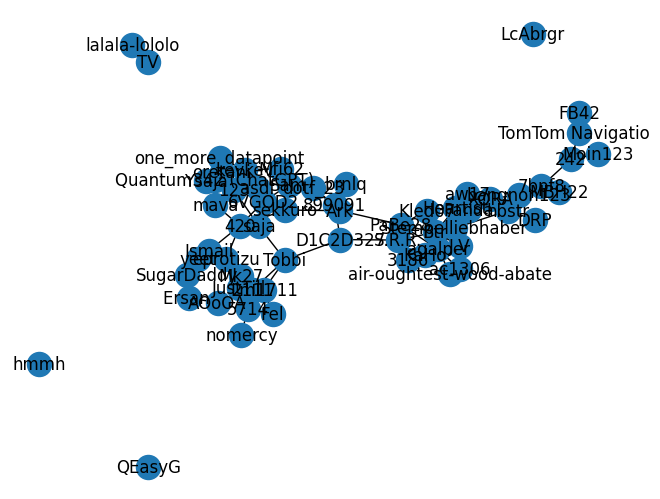

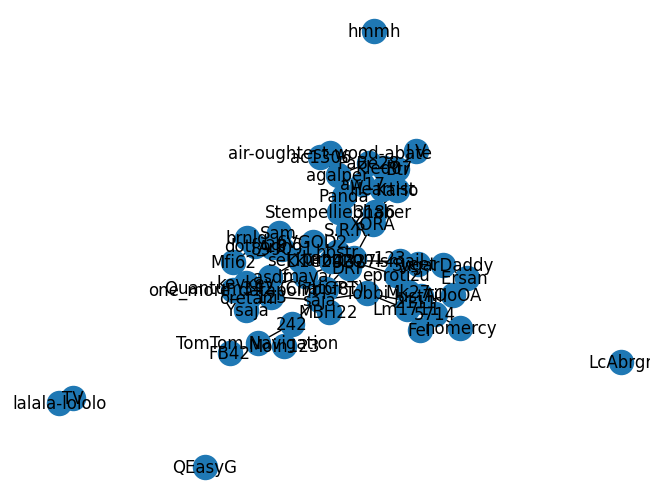

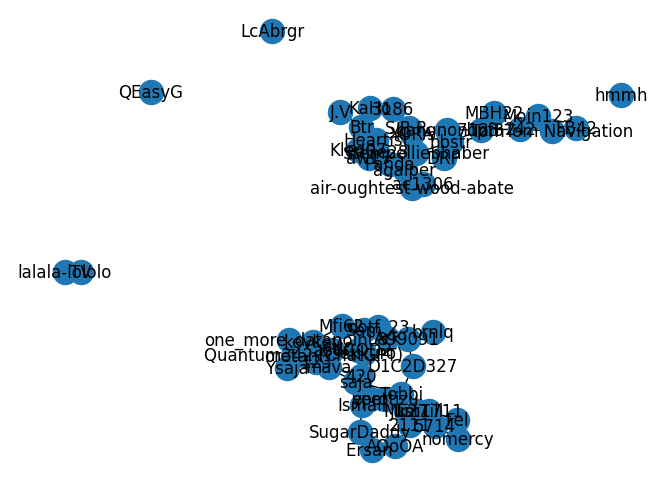

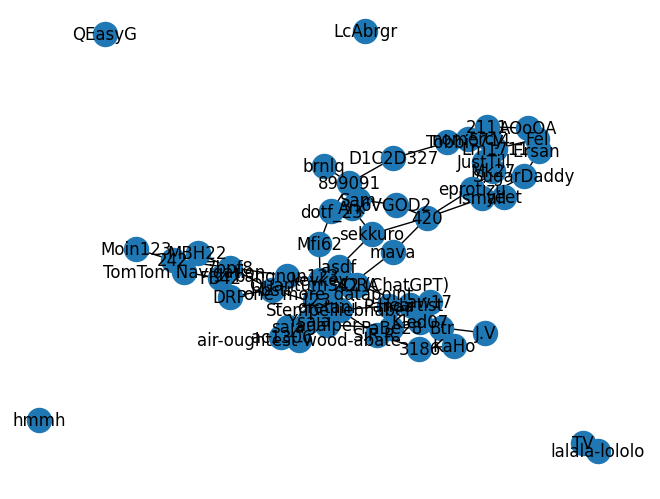

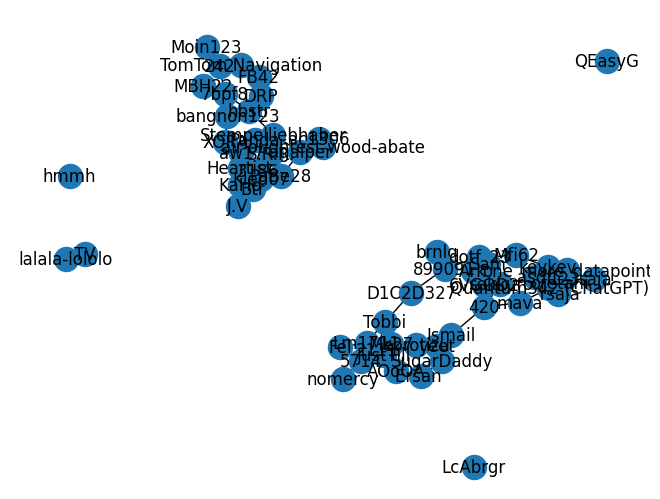

In [57]:
num_iterations = 5

G_new = G.copy()
for _ in range(num_iterations):
    edge_betweenness = nx.edge_betweenness_centrality(G_new)
    edge_betweenness = pd.DataFrame(edge_betweenness.items()).sort_values(by=[1], ascending=False)
    link_to_remove = edge_betweenness.iloc[0,0]
    G_new.remove_edge(*link_to_remove)
    
    nx.draw(G_new, with_labels=True)
    plt.show()

In [58]:
nx.number_connected_components(G)

5

In [59]:
partitions = nx.community.girvan_newman(G)
partitions

<generator object girvan_newman at 0x7f0653fa4b30>

In [60]:
next(partitions)

({'TV', 'lalala-lololo'},
 {'242',
  '3186',
  '7bpf8',
  'Btr',
  'DRP',
  'FB42',
  'Heartist',
  'J.V',
  'KaHo',
  'Kled07',
  'MBH22',
  'Moin123',
  'PaBe28',
  'Panda',
  'S.R.R.',
  'Stempelliebhaber',
  'TomTom Navigation',
  'XORA',
  'ac1306',
  'agalper',
  'air-oughtest-wood-abate',
  'aw17',
  'bangnon123',
  'hbstr'},
 {'LcAbrgr'},
 {'123',
  '2111',
  '420',
  '5714',
  '6VGOD2',
  '899091',
  'AOoOA',
  'Ark',
  'D1C2D327',
  'Ersan ',
  'Fel',
  'Ismail',
  'JustTill',
  'Lm1711',
  'Mfi62',
  'Mk27',
  'Quantum342 (ChatGPT)',
  'Sam',
  'SugarDaddy',
  'Tobbi',
  'Ysaja',
  'asdf',
  'brnlq',
  'dotf_23',
  'eprotizu',
  'kevkev',
  'mava',
  'nomercy',
  'one_more_datapoint',
  'oretani',
  'saja',
  'sekkuro',
  'yeet'},
 {'QEasyG'},
 {'hmmh'})

({'TV', 'lalala-lololo'},
 {'242',
  '7bpf8',
  'DRP',
  'FB42',
  'MBH22',
  'Moin123',
  'TomTom Navigation',
  'XORA',
  'bangnon123',
  'hbstr'},
 {'3186',
  'Btr',
  'Heartist',
  'J.V',
  'KaHo',
  'Kled07',
  'PaBe28',
  'Panda',
  'S.R.R.',
  'Stempelliebhaber',
  'ac1306',
  'agalper',
  'air-oughtest-wood-abate',
  'aw17'},
 {'LcAbrgr'},
 {'123',
  'Quantum342 (ChatGPT)',
  'Ysaja',
  'asdf',
  'kevkev',
  'mava',
  'one_more_datapoint',
  'oretani',
  'saja'},
 {'2111',
  '5714',
  'AOoOA',
  'D1C2D327',
  'Ersan ',
  'Fel',
  'Ismail',
  'JustTill',
  'Lm1711',
  'Mk27',
  'SugarDaddy',
  'Tobbi',
  'eprotizu',
  'nomercy',
  'yeet'},
 {'420',
  '6VGOD2',
  '899091',
  'Ark',
  'Mfi62',
  'Sam',
  'brnlq',
  'dotf_23',
  'sekkuro'},
 {'QEasyG'},
 {'hmmh'})

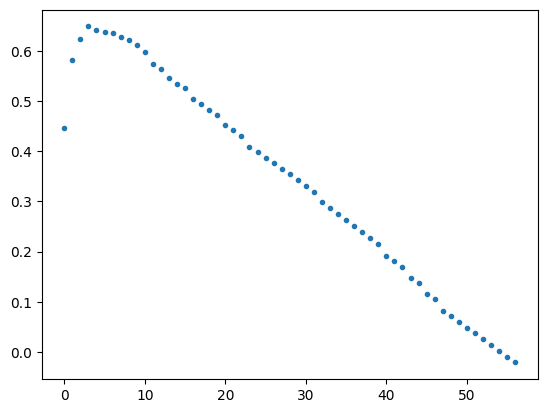

In [61]:
partitions = nx.community.girvan_newman(G)
best_modularity = -1
modularities = []
for partition in partitions:
    modularity = nx.community.quality.modularity(G, partition)
    if modularity > best_modularity:
        best_modularity = modularity
        best_partition = partition
    modularities.append(modularity)


plt.plot(modularities, ".")
best_partition

In [62]:
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map

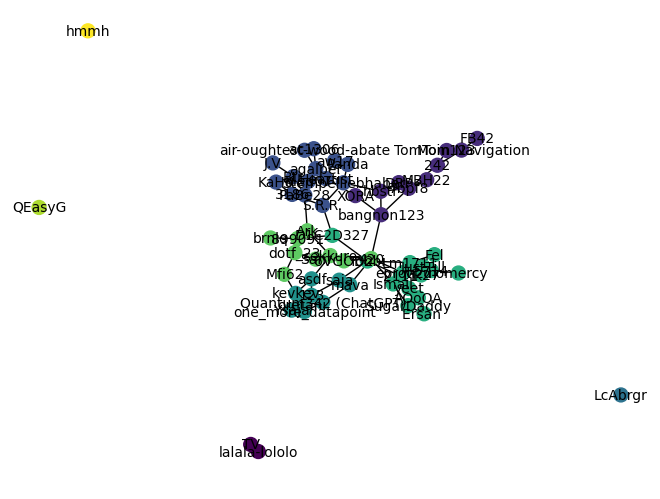

In [63]:
pos = nx.layout.spring_layout(G, k=0.1, seed=123)

best_partition_map = create_partition_map(best_partition)

node_colors = [best_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors,
       pos=pos,font_size=10,node_size=100)

In [64]:
nx.write_graphml_lxml(G, "./data/graph.graphml")

## StudentMatcher

Hier alle Werte miteinbeziehen, der Grenzwert ist egal, es werden die 5 höchsten Werte für jeden Teilnehmer gesucht.

In [65]:
sorted_indices = []
for p in range(cosine_sim.shape[0]):
    sorted_indices.append(np.argsort(cosine_sim[p])[::-1])

In [66]:
sorted_indices

[array([ 0, 51, 25,  7, 56, 26, 20, 31, 41, 57,  3,  5, 58, 27, 59, 19, 54,
        55, 46, 50, 28,  2, 13, 40, 49, 35, 44, 47, 29, 32, 36, 42, 38, 12,
         4, 60, 61, 43, 48, 15, 21, 33,  8, 30, 23, 24, 18,  6, 39, 22, 52,
         1, 34, 10, 37,  9, 17, 14, 16, 53, 11, 45]),
 array([ 1, 48, 21, 12, 57,  9, 51, 23, 34,  5, 60,  8,  6,  2, 17, 24, 38,
        37, 53, 42, 15, 41, 11,  3, 45, 43, 35, 36, 16, 31, 10, 50, 55, 30,
        39, 54, 13, 40, 27, 14, 58, 29, 18,  7, 49, 46, 26, 22, 28, 59,  0,
        52, 47, 56, 20, 32, 44, 61, 25, 33, 19,  4]),
 array([ 2, 57, 38, 18, 51, 35, 44, 41, 12, 60, 28, 55,  1, 37, 10, 21, 29,
        26, 40, 52, 16, 36, 50,  0, 27, 30, 43,  5, 45,  7, 20, 42,  9, 31,
        17, 23,  6, 25,  8, 48, 24, 32, 46, 19, 49, 58, 56, 14,  4, 47, 15,
        61, 22, 34, 53, 39, 54,  3, 59, 13, 33, 11]),
 array([ 3,  5, 20, 40, 32, 56, 46, 42, 25, 54, 51,  0, 11, 13, 53, 24, 21,
        33,  7,  4,  1, 58, 22, 28, 34,  8, 36, 61, 59, 57, 41,  9, 30, 15,
  

In [67]:
type(test)
indices_array = np.array(sorted_indices)

In [68]:
fuenf_freunde = []
freundesliste = []

for indices_array in sorted_indices:
    fuenf_freunde.append(indices_array[1:6])
    fuenf_freunde_array = np.array(fuenf_freunde)
    
for row in range(fuenf_freunde_array.shape[0]): 
    for element in fuenf_freunde_array[row]:
        freundesliste.append([data.iloc[row].Pseudonym,data.iloc[element].Pseudonym])

In [69]:
freundesliste

[['lalala-lololo', 'TV'],
 ['lalala-lololo', 'nomercy'],
 ['lalala-lololo', 'air-oughtest-wood-abate'],
 ['lalala-lololo', 'JustTill'],
 ['lalala-lololo', 'agalper'],
 ['hbstr', 'DRP'],
 ['hbstr', '7bpf8'],
 ['hbstr', 'bangnon123'],
 ['hbstr', 'Stempelliebhaber'],
 ['hbstr', 'Quantum342 (ChatGPT)'],
 ['Panda', 'Stempelliebhaber'],
 ['Panda', 'aw17'],
 ['Panda', 'Heartist'],
 ['Panda', 'TV'],
 ['Panda', 'KaHo'],
 ['TomTom Navigation', '242'],
 ['TomTom Navigation', 'FB42'],
 ['TomTom Navigation', 'hmmh'],
 ['TomTom Navigation', 'Moin123'],
 ['TomTom Navigation', 'JustTill'],
 ['LcAbrgr', 'nomercy'],
 ['LcAbrgr', 'D1C2D327'],
 ['LcAbrgr', 'Mfi62'],
 ['LcAbrgr', '6VGOD2'],
 ['LcAbrgr', 'JustTill'],
 ['242', '7bpf8'],
 ['242', 'TomTom Navigation'],
 ['242', 'Moin123'],
 ['242', 'ac1306'],
 ['242', 'TV'],
 ['3186', 'S.R.R.'],
 ['3186', 'KaHo'],
 ['3186', 'Stempelliebhaber'],
 ['3186', 'TV'],
 ['3186', 'one_more_datapoint'],
 ['air-oughtest-wood-abate', 'agalper'],
 ['air-oughtest-wood-abate

In [70]:
#DataFrame erstellen, mit der Liste der Pseudonymen und ihren zugeordneten Freunden
data_freunde = pd.DataFrame(freundesliste, columns=["Name", "Freunde"])

print(data_freunde)

              Name                  Freunde
0    lalala-lololo                       TV
1    lalala-lololo                  nomercy
2    lalala-lololo  air-oughtest-wood-abate
3    lalala-lololo                 JustTill
4    lalala-lololo                  agalper
..             ...                      ...
305       D1C2D327                   899091
306       D1C2D327                    Tobbi
307       D1C2D327                   S.R.R.
308       D1C2D327                 JustTill
309       D1C2D327                   PaBe28

[310 rows x 2 columns]


In [71]:
data_freunde.to_csv("./data/data_freunde.csv", sep=',')

In [72]:
filename = "./data/data_freunde.csv"

data = pd.read_csv(filename)

In [73]:
data

,Unnamed: 0,Name,Freunde
0,0,lalala-lololo,TV
1,1,lalala-lololo,nomercy
2,2,lalala-lololo,air-oughtest-wood-abate
3,3,lalala-lololo,JustTill
4,4,lalala-lololo,agalper
...,...,...,...
305,305,D1C2D327,899091
306,306,D1C2D327,Tobbi
307,307,D1C2D327,S.R.R.
308,308,D1C2D327,JustTill
